In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# 读取数据
data = pd.read_csv('GMD_v1.csv')

# 划分特征和目标变量
X = data[['red', 'nir', 'swir1', 'swir2']]
y = data['landcover']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# 创建随机森林分类器实例
clf = RandomForestClassifier(random_state=60)

# 定义要搜索的超参数网格
param_grid = {
    'n_estimators': [100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500],   # 树的数量
    'max_depth': [None, 10, 15, 20, 25, 30],    # 最大深度
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], #最小分割样本数
    'bootstrap': [True, False],     # 是否使用bootstrap
}

# 创建GridSearchCV实例
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# 执行超参数寻优
grid_search.fit(X_train, y_train)

# 输出最佳参数
print('最佳参数:', grid_search.best_params_)

# 使用最佳参数创建新的模型
best_clf = grid_search.best_estimator_

# 使用新的模型进行预测
predictions = best_clf.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, predictions)

# print('预测结果:', predictions)
print('模型准确率:', accuracy)

# 获取超参数搜索结果
cv_results = grid_search.cv_results_

# Save the dictionary to a .npz file
np.savez('n_estimators-min_samples_split-data.npz', **cv_results)





Fitting 3 folds for each of 1836 candidates, totalling 5508 fits
最佳参数: {'bootstrap': True, 'max_depth': 20, 'min_samples_split': 3, 'n_estimators': 400}
模型准确率: 0.8497777777777777


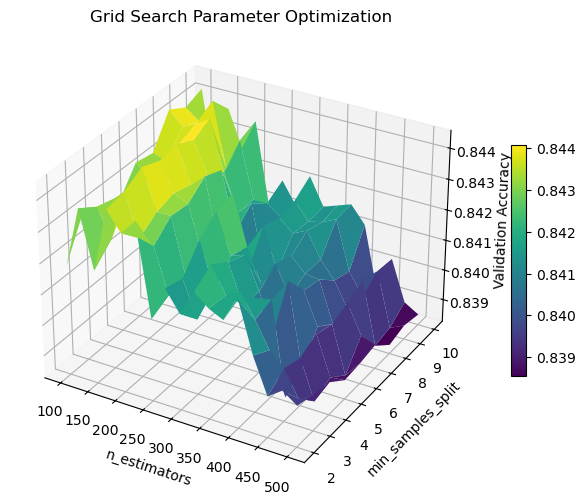

In [7]:
# 获取网格搜索的参数
grid_params = list(grid_search.param_grid.keys())

# 绘制3D图
%matplotlib inline
%config InlineBackened.figure_format = 'retina'
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # '111'表示1行1列第一个位置

# 调整图像大小
fig.set_size_inches(10, 6)

param1 = 'n_estimators'
param2 = 'min_samples_split'
scores = cv_results['mean_test_score']

# Set the axes labels
ax.set_xlabel(param1)
ax.set_ylabel(param2)
ax.set_zlabel('Validation Accuracy')

param1_flag = np.array([100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500]).reshape(17, 1)
param2_flag = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(1, 9)
scores_2d = scores.reshape((17, 9))

# Create the surface plot
surf = ax.plot_surface(param1_flag, param2_flag, scores_2d, cmap='viridis')

# Add a colorbar
fig.colorbar(surf, shrink=0.5, aspect=15)    # shrink参数表示缩小比例，aspect参数表示颜色条的宽度

# Show the plot
plt.title('Grid Search Parameter Optimization')
plt.show()